In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from collections import Counter
import warnings
import joblib

In [127]:
file_path = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv'

df = pd.read_csv(file_path)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [128]:
df.shape # checking the dimension of the data set

(31647, 18)

In [129]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [130]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [131]:
#Check the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n") 

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

EDA

In [132]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


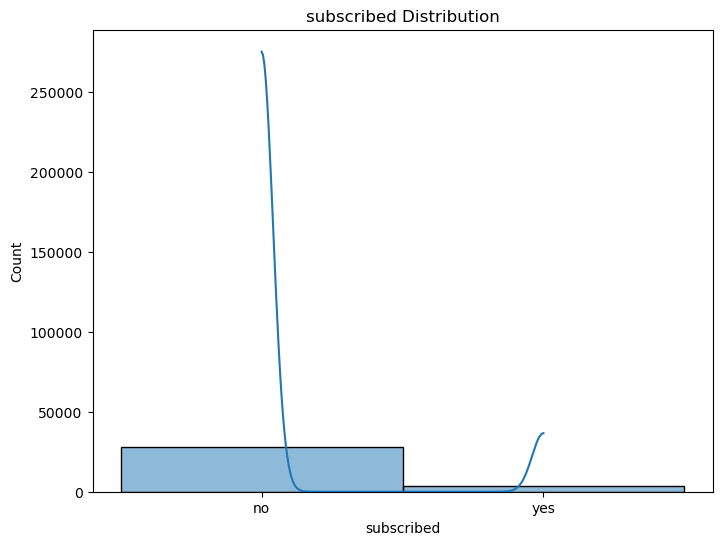

In [133]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['subscribed'], bins=20, kde=True)
plt.title('subscribed Distribution')
plt.show()

Bivariate Analysis

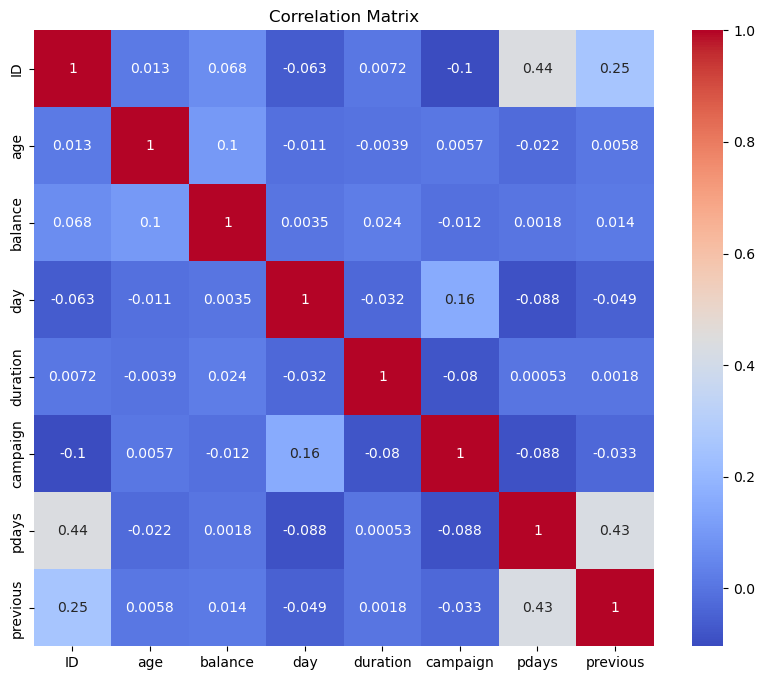

In [134]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

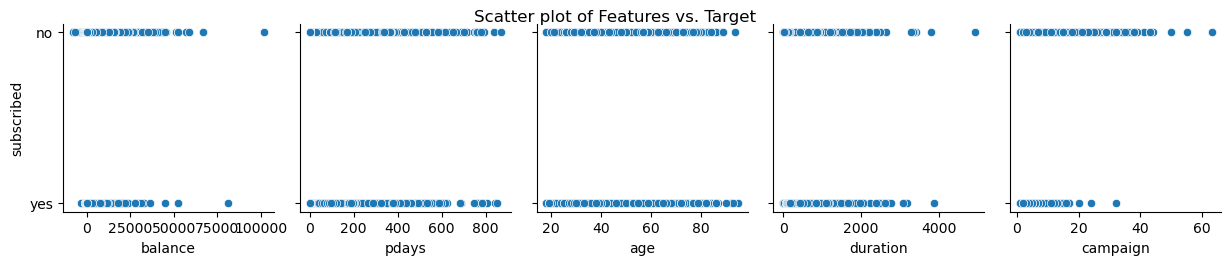

In [135]:

# Scatter plot for selected features vs. target
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=['balance', 'pdays', 'age', 'duration' , 'campaign'], y_vars='subscribed', kind='scatter')
plt.suptitle('Scatter plot of Features vs. Target', y=1.02)
plt.show()

Multivariate Analysis

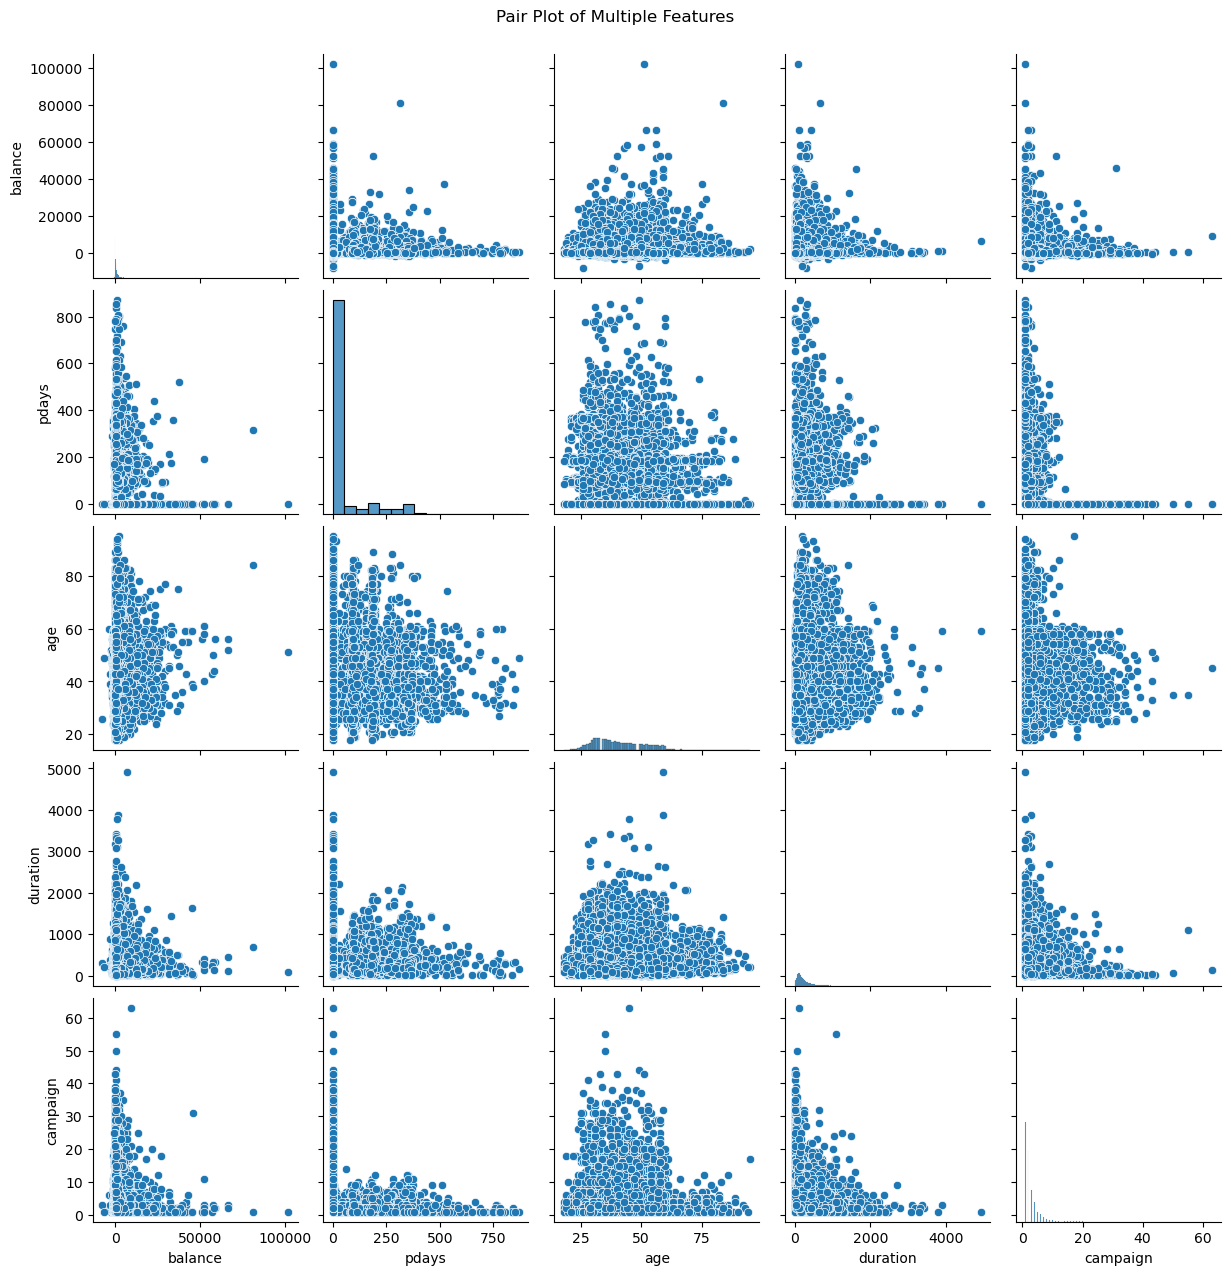

In [136]:
# Pair plot for multiple features
sns.pairplot(df, vars=['balance', 'pdays', 'age', 'duration' , 'campaign'])
plt.suptitle('Pair Plot of Multiple Features', y=1.02)
plt.show()

Preprocessing

In [137]:
# Handling missing values
df.dropna(inplace=True)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [138]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR-based outlier detection
threshold_iqr = 1.5

# Find data points with values beyond the IQR threshold
outliers_iqr = ((df < (Q1 - threshold_iqr * IQR)) | (df > (Q3 + threshold_iqr * IQR)))

print(outliers_iqr)

          ID    age  balance  campaign  contact    day  default  duration  \
0      False  False    False     False    False  False    False     False   
1      False  False    False     False    False  False    False     False   
2      False  False    False     False    False  False    False     False   
3      False  False    False     False    False  False    False      True   
4      False  False    False     False    False  False    False     False   
...      ...    ...      ...       ...      ...    ...      ...       ...   
31642  False  False    False     False    False  False    False     False   
31643  False  False    False     False    False  False    False     False   
31644  False  False    False     False    False  False    False     False   
31645  False  False    False      True    False  False    False     False   
31646  False  False    False     False    False  False    False      True   

       education  housing    job   loan  marital  month  pdays  poutcome  \

In [139]:
# Remove outliers based on IQR
data_no_outliers_iqr = df[~outliers_iqr.any(axis=1)]
print(data_no_outliers_iqr)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
4      29842   31  technician   married  secondary      no      119     yes   
5      29390   33  management    single   tertiary      no        0     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31640  12109   43  management    single  secondary      no     2968      no   
31641   9476   37  technician    single   tertiary      no     1309      no   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   

      loan    contact  day month  duration  campaig

In [140]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [141]:
# Splitting data into features and target
X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
